In [4]:
from utils import *

In [5]:
train_images=load_images('data/train-images-idx3-ubyte.gz')
train_labels=load_labels('data/train-labels-idx1-ubyte.gz')
test_images=load_images('data/t10k-images-idx3-ubyte.gz')
test_labels=load_labels('data/t10k-labels-idx1-ubyte.gz')


In [6]:
print('X_train: ' + str(train_images.shape))
print('Y_train: ' + str(train_labels.shape))
print('X_test:  '  + str(test_images.shape))
print('Y_test:  '  + str(test_labels.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [7]:
image_size=28

In [8]:
train_X = np.reshape(train_images, (train_images.shape[0],28*28), "F")
test_X = np.reshape(test_images, (test_images.shape[0], 28*28 ), "F")

In [9]:
train_X = train_X.T
test_X = test_X.T

In [10]:
U, S, VT = np.linalg.svd(train_X, full_matrices=False)

In [ ]:
print('U_Shape: ' + str(U.shape))
print('S_train: ' + str(S.shape))
print('VT_test:  '  + str(VT.shape))


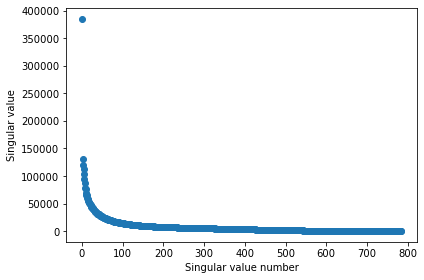

In [11]:
# plot singular values on eigenfaces
plt.figure(1, figsize = (6,4))

plt.scatter(np.arange(1,len(S)+1), S)
plt.xlabel('Singular value number')
plt.ylabel('Singular value')
plt.tight_layout()
plt.savefig('SV_Spectrum.pdf')
plt.show()

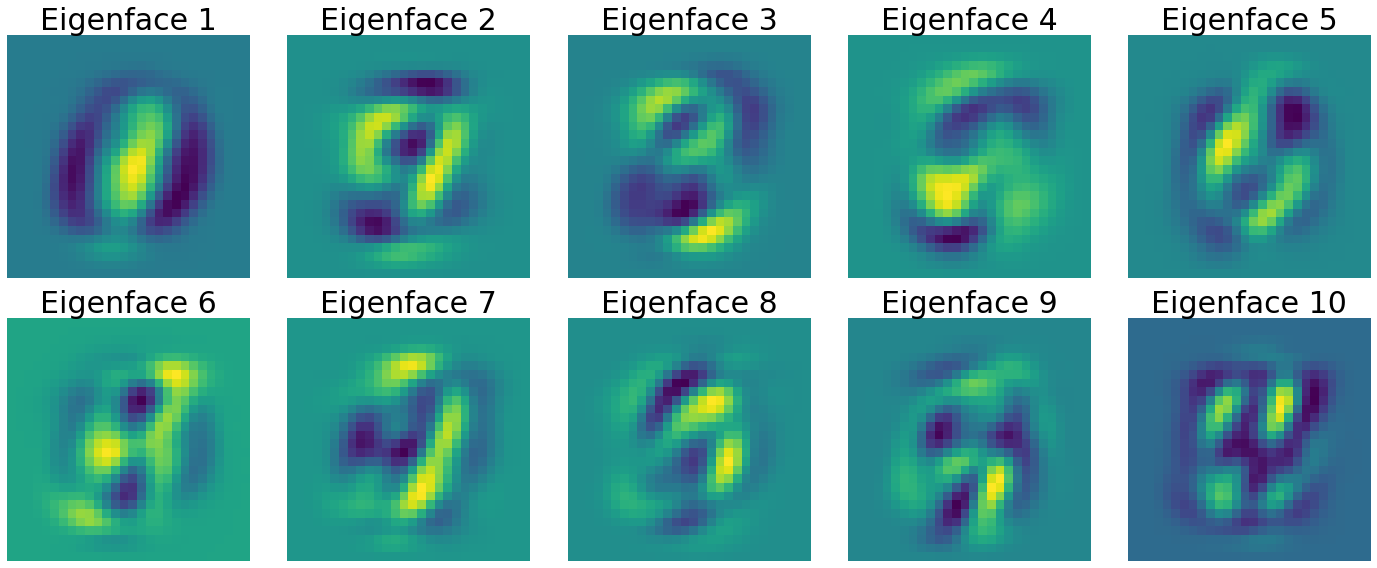

In [61]:
plt.figure(2, figsize = (20,8))

for i in range(10):
    plt.subplot(2,5,i+1)
    eigen = np.reshape(U[:,i+1], (28, 28), "F")
    plt.title(f'Eigenface {i+1}', fontsize=30)
    plt.axis('off')
    plt.imshow(eigen)
plt.tight_layout()
plt.tight_layout()
plt.savefig("eigenfaces.pdf")

#plt.show()


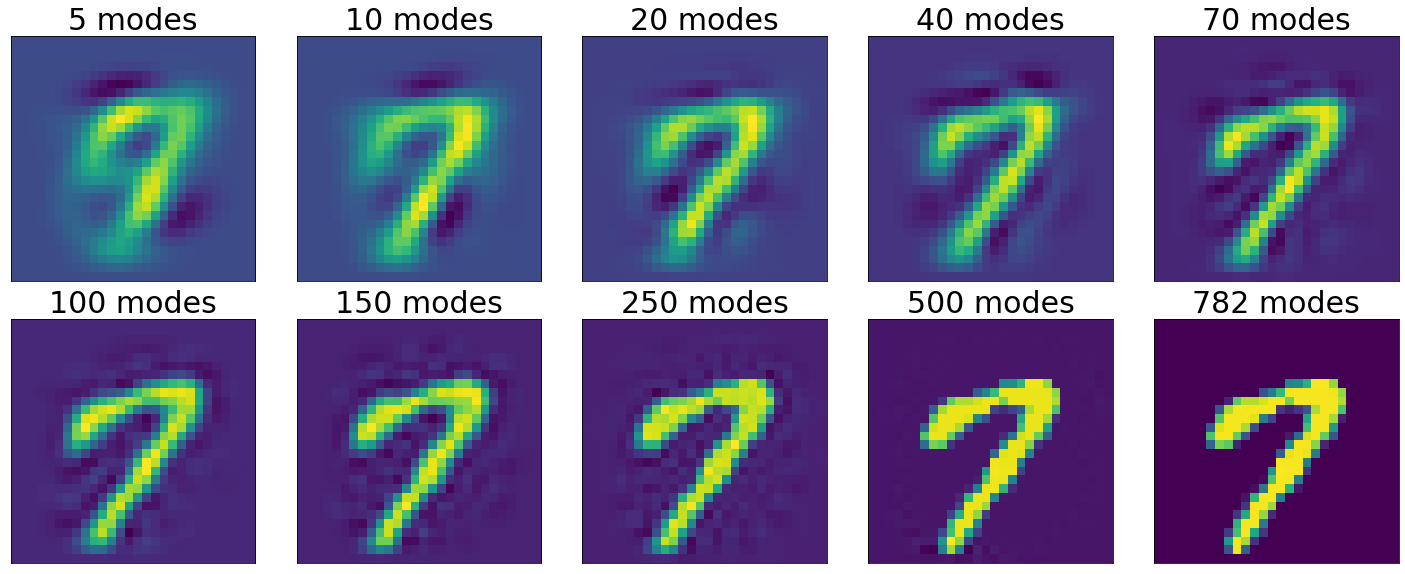

In [12]:
num_modes = [5, 10, 20, 40, 70, 100, 150, 250, 500, 782]
plt.figure(3, figsize=(20,8))
for i in range(len(num_modes)):
    plt.subplot(2,5,i+1)
    image = U[:,0:num_modes[i]] @ np.diag(S)[0:num_modes[i],0:num_modes[i]] @ VT[ 0:num_modes[i],:]
    image = np.reshape(image[:,15], (28, 28), "F")
    ax = plt.gca()
    ax.axes.xaxis.set_ticks([])
    ax.axes.yaxis.set_ticks([])
    plt.title(f"{num_modes[i]} modes", fontsize=30)
    plt.imshow(image)
plt.tight_layout()

plt.savefig("Modes_7.pdf")
plt.show()

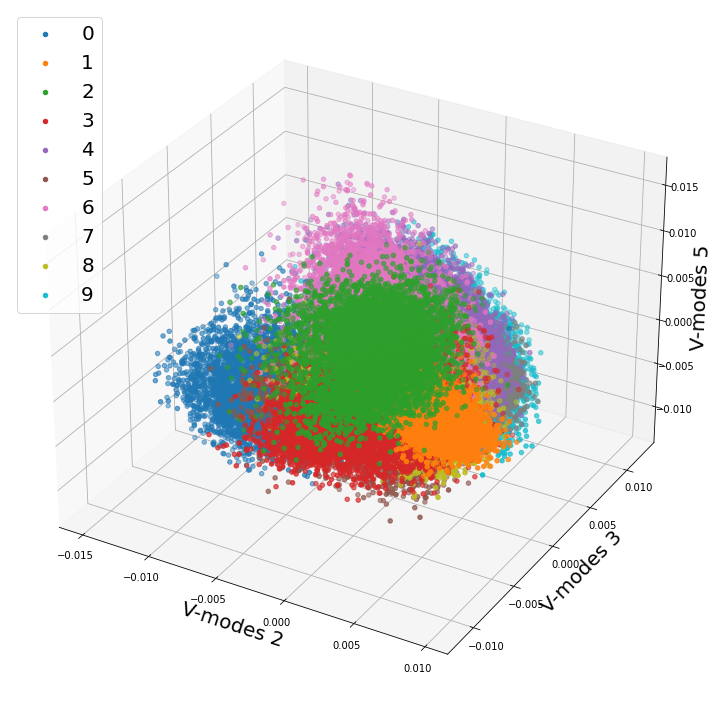

In [77]:
plt.figure(5, figsize=(12,14))
ax = plt.axes(projection ="3d")
for i in range(10):
    arg = np.argwhere(train_labels==i)
    ax.scatter3D(VT[1,arg[:,0]], VT[2,arg[:,0]], VT[4,arg[:,0]], label = i)
ax.legend(loc='upper left', fontsize = 20)
ax.set_xlabel('V-modes 2', fontsize = 20)
ax.set_ylabel('V-modes 3', fontsize = 20)
ax.set_zlabel('V-modes 5', fontsize = 20)
ax.grid(True)
plt.tight_layout()
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.savefig('3D.pdf', bbox_inches = 'tight', dpi=300)

## Part 2

In [20]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import svm
from sklearn import tree
from sklearn.metrics import accuracy_score

In [13]:
train_X_proj = np.diag(S) @ VT
train_X_proj = train_X_proj.T

test_X_proj = U.T @ test_X
test_X_proj = test_X_proj.T

In [42]:
def prep_data(n_digits, digits, n_features=10):
    if n_digits != len(digits):
        print("Unmatched digits, check input")
        return 0
        pass
    #print(n_features)

    global train_X_proj, test_X_proj
    global train_labels, test_labels

    if n_digits == 2:
        digit1 = digits[0]
        digit2 = digits[1]

        train_arg1 = np.argwhere(train_labels == digit1)
        train_arg2 = np.argwhere(train_labels == digit2)

        train_X1 = train_X_proj[train_arg1[:, 0], 1:n_features]
        train_X2 = train_X_proj[train_arg2[:, 0], 1:n_features]

        train_y1 = train_labels[train_arg1[:, 0]]
        train_y2 = train_labels[train_arg2[:, 0]]

        test_arg1 = np.argwhere(test_labels == digit1)
        test_arg2 = np.argwhere(test_labels == digit2)

        test_X1 = test_X_proj[test_arg1[:, 0], 1:n_features]
        test_X2 = test_X_proj[test_arg2[:, 0], 1:n_features]

        test_y1 = test_labels[test_arg1[:, 0]]
        test_y2 = test_labels[test_arg2[:, 0]]

        train_X_digits = np.concatenate((train_X1, train_X2), axis=0)
        train_y_digits = np.concatenate((train_y1, train_y2), axis=0)

        test_X_digits = np.concatenate((test_X1, test_X2), axis=0)
        test_y_digits = np.concatenate((test_y1, test_y2), axis=0)

    if n_digits == 3:
        digit1 = digits[0]
        digit2 = digits[1]
        digit3 = digits[2]

        train_arg1 = np.argwhere(train_labels == digit1)
        train_arg2 = np.argwhere(train_labels == digit2)
        train_arg3 = np.argwhere(train_labels == digit3)

        train_X1 = train_X_proj[train_arg1[:, 0], 1:n_features]
        train_X2 = train_X_proj[train_arg2[:, 0], 1:n_features]
        train_X3 = train_X_proj[train_arg3[:, 0], 1:n_features]

        train_y1 = train_labels[train_arg1[:, 0]]
        train_y2 = train_labels[train_arg2[:, 0]]
        train_y3 = train_labels[train_arg3[:, 0]]

        test_arg1 = np.argwhere(test_labels == digit1)
        test_arg2 = np.argwhere(test_labels == digit2)
        test_arg3 = np.argwhere(test_labels == digit3)

        test_X1 = test_X_proj[test_arg1[:, 0], 1:n_features]
        test_X2 = test_X_proj[test_arg2[:, 0], 1:n_features]
        test_X3 = test_X_proj[test_arg3[:, 0], 1:n_features]

        test_y1 = test_labels[test_arg1[:, 0]]
        test_y2 = test_labels[test_arg2[:, 0]]
        test_y3 = test_labels[test_arg3[:, 0]]

        train_X_digits = np.concatenate((train_X1, train_X2, train_X3), axis=0)
        train_y_digits = np.concatenate((train_y1, train_y2, train_y3), axis=0)

        test_X_digits = np.concatenate((test_X1, test_X2, test_X3), axis=0)
        test_y_digits = np.concatenate((test_y1, test_y2, test_y3), axis=0)

    return train_X_digits, train_y_digits, test_X_digits, test_y_digits
    pass


def make_bar_plot(y_predict, n_digits, digits):
    fig = plt.figure()
    plt.plot(y_predict)
    plt.ylabel("prediction results")
    plt.xlabel("test datasets")
    if n_digits == 2:
        plt.savefig(f"{digits[0]}_vs_{digits[1]}.pdf")
    if n_digits == 3:
        plt.savefig(f"{digits[0]}_vs_{digits[1]}_vs_{digits[2]}.pdf")

    pass


def train_model(model, n_digits, digits, n_features=10, do_cv=False, do_plot=False):
    [train_X, train_y, test_X, test_y] = prep_data(n_digits, digits, n_features)

    if model == "lda":
        model = LDA()
    elif model == "svm":
        model = svm.SVC()
    elif model == "tree":
        model = tree.DecisionTreeClassifier()

    if do_cv:
        cv_score = cross_val_score(model, train_X, train_y, cv=10, scoring="accuracy")
        mean_cv_score = np.mean(cv_score)
        print(f"cross_val_score:\n", cv_score)
        print(f"mean cross_val_score: ", mean_cv_score)

        return mean_cv_score

    model.fit(train_X, train_y)
    y_predict = model.predict(test_X)
    accu = accuracy_score(test_y, y_predict)

    #print(f"the accuracy on test dataset: {accu}")

    if do_plot:
        make_bar_plot(y_predict, n_digits, digits)

    return accu

    pass

In [14]:
train_model("lda", 2, (6,7), 40, do_plot=True)

40


NameError: name 'train_labels' is not defined

0.9601351351351352

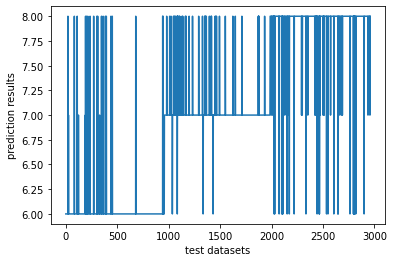

In [50]:
train_model("lda", 3, (6,7,8), 40, do_plot=True)

In [51]:
accu_table_lda = np.zeros((10,10), dtype=float)
for i in range(0,10):
    print(i)
    for j in range (i+1, 10):
        #print(i,j)
        accu_table_lda[i,j] = train_model("lda", 2, (i,j), 40)
        accu_table_lda[j,i] = accu_table_lda[i,j]

0
1
2
3
4
5
6
7
8
9


In [55]:
pair_easy = np.unravel_index(np.argmax(accu_table_lda, axis=None), accu_table_lda.shape)
pair_diff = np.where(accu_table_lda ==np.min(accu_table_lda[accu_table_lda!= 0]))[0]

In [78]:
pair_diff

array([5, 8])

In [59]:
np.savetxt('accu_table_lda.csv', accu_table_lda, delimiter=",")


In [58]:
accu_table_lda

array([[0.        , 0.99858156, 0.98558648, 0.99346734, 0.99643221,
        0.9866453 , 0.98916409, 0.99501992, 0.99078813, 0.99095023],
       [0.99858156, 0.        , 0.97600369, 0.98974359, 0.9971658 ,
        0.99210656, 0.99569995, 0.98428109, 0.97297297, 0.99440299],
       [0.98558648, 0.97600369, 0.        , 0.97453477, 0.97666336,
        0.97141372, 0.97336683, 0.96941748, 0.95663011, 0.97991181],
       [0.99346734, 0.98974359, 0.97453477, 0.        , 0.98945783,
        0.95425868, 0.99186992, 0.97595682, 0.95614919, 0.97672115],
       [0.99643221, 0.9971658 , 0.97666336, 0.98945783, 0.        ,
        0.98826041, 0.99020619, 0.98208955, 0.98619632, 0.94374686],
       [0.9866453 , 0.99210656, 0.97141372, 0.95425868, 0.98826041,
        0.        , 0.96648649, 0.98958333, 0.93729904, 0.97895844],
       [0.98916409, 0.99569995, 0.97336683, 0.99186992, 0.99020619,
        0.96648649, 0.        , 0.9959718 , 0.97670807, 0.99491612],
       [0.99501992, 0.98428109, 0.9694174

In [80]:
models = ["lda", "tree", "svm"]
pairs = [(0,1), (5,8)]
for i in range(len(pairs)):
    for j in range(len(models)):
        accu = train_model(models[j], 2, pairs[i], 40)
        print(f"{pairs[i]}, {models[j]}, {accu}")

(0, 1), lda, 0.9985815602836879
(0, 1), tree, 0.9957446808510638
(0, 1), svm, 0.9995271867612293
(5, 8), lda, 0.9372990353697749
(5, 8), tree, 0.9244372990353698
(5, 8), svm, 0.9962486602357985


In [ ]:
accu_table_svm = np.zeros((10,10), dtype=float)
for i in range(0,10):
    for j in range (i+1, 10):
        #print(i,j)
        accu_table_svm[i,j] = train_model("svm", 2, (i,j), 40)
        accu_table_svm[j,i] = accu_table_svm[i,j]
        
np.savetxt('accu_table_lda.csv', accu_table_lda, delimiter=",")


In [ ]:
accu_table_dt = np.zeros((10,10), dtype=float)
for i in range(0,10):
    for j in range (i+1, 10):
        #print(i,j)
        accu_table_dt[i,j] = accu_table_dt("tree", 2, (i,j), 40)
        accu_table_dt[j,i] = accu_table_dt[i,j]
        
np.savetxt('accu_table_lda.csv', accu_table_lda, delimiter=",")


In [83]:
n_features = 40
train_X = train_X_proj[:, 1:n_features]
test_X = test_X_proj[:, 1:n_features]

In [88]:
lda_model = LDA()
lda_model.fit(train_X, train_labels)
lda_y_predict = lda_model.predict(test_X)
lda_accu = accuracy_score(test_labels, lda_y_predict)
print(lda_accu)

0.8598


In [89]:
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(train_X, train_labels)
tree_y_predict = tree_model.predict(test_X)
tree_accu = accuracy_score(test_labels, tree_y_predict)
print(tree_accu)

0.8525


In [90]:
svm_model = svm.SVC()
svm_model.fit(train_X, train_labels)
svm_y_predict = svm_model.predict(test_X)
svm_accu = accuracy_score(test_labels, svm_y_predict)
print(svm_accu)

0.9819


In [91]:
lda_y_predict_train = lda_model.predict(train_X)
lda_accu_train = accuracy_score(train_labels, lda_y_predict_train)
print(lda_accu_train)

0.8495833333333334


In [92]:
tree_y_predict_train = tree_model.predict(train_X)
tree_accu_train = accuracy_score(train_labels, tree_y_predict_train)
print(tree_accu_train)

1.0


In [93]:
svm_y_predict_train = svm_model.predict(train_X)
svm_accu_train = accuracy_score(train_labels, svm_y_predict_train)
print(svm_accu_train)

0.9900333333333333
